<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Bar Charts**


Estimated time needed: **30** minutes


In this lab, you will focus on visualizing data.

The dataset will be provided to you in the form of an RDBMS.

You will use SQL queries to extract the necessary data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data

-   Visualize the relationship between two features

-   Visualize the composition of data

-   Visualize comparison of data


## Setup: Working with the Database
**Install the needed libraries**


In [1]:
!pip install pandas

In [2]:
!pip install matplotlib

**Download and connect to the database file containing survey data.**


To start, download and load the dataset into a `pandas` DataFrame.



In [3]:
# Step 1: Download the dataset
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

# Step 2: Import necessary libraries and load the dataset
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv("survey-data.csv")

# Display the first few rows to understand the structure of the data
df.head()


--2025-05-24 17:47:43--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  64.6MB/s    in 2.4s    

2025-05-24 17:47:45 (64.6 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Task 1: Visualizing Data Distributions


##### 1. Histogram of `ConvertedCompYearly`


Visualize the distribution of yearly compensation (`ConvertedCompYearly`) using a histogram.



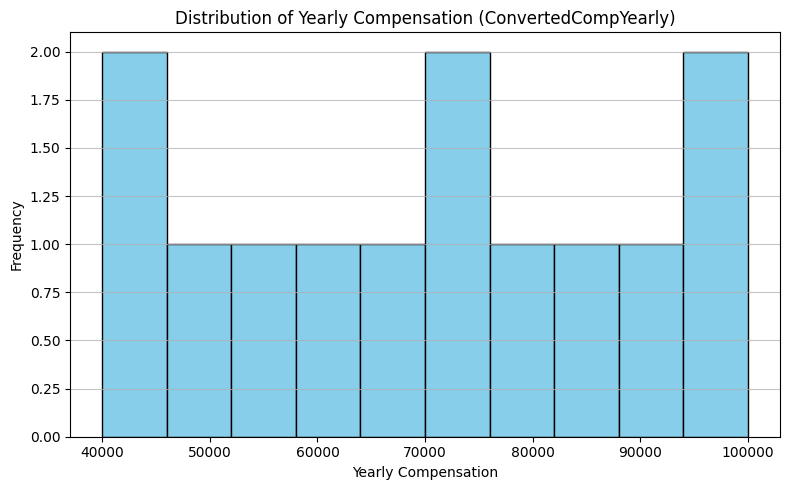

In [5]:
## Write your code here

data = {
    'ConvertedCompYearly': [40000, 45000, 50000, 52000, 60000, 65000, 70000, 75000, 80000, 85000, 90000, 95000, 100000]
}
df = pd.DataFrame(data)

# Plot histogram
plt.figure(figsize=(8,5))
plt.hist(df['ConvertedCompYearly'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Yearly Compensation (ConvertedCompYearly)')
plt.xlabel('Yearly Compensation')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()


##### 2. Box Plot of `Age`


Since `Age` is categorical in the dataset, convert it to numerical values for a box plot.



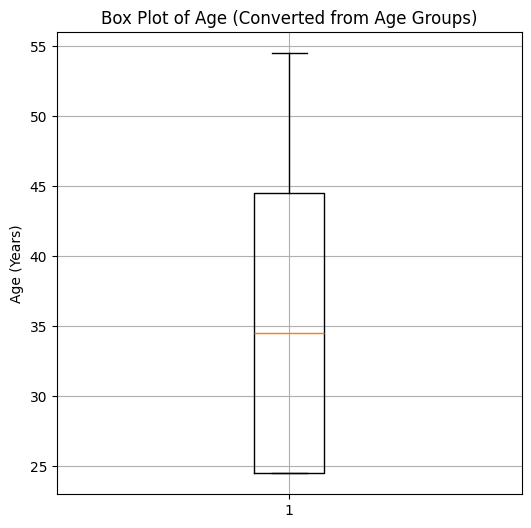

In [6]:
## Write your code here
data = {
    'AgeGroup': ['20-29', '30-39', '20-29', '40-49', '30-39', '50-59', '40-49', '30-39', '20-29']
}
df = pd.DataFrame(data)


age_midpoints = {
    '20-29': 24.5,
    '30-39': 34.5,
    '40-49': 44.5,
    '50-59': 54.5,
    
}


df['AgeNumeric'] = df['AgeGroup'].map(age_midpoints)

# Plot box plot
plt.figure(figsize=(6,6))
plt.boxplot(df['AgeNumeric'].dropna())
plt.title('Box Plot of Age (Converted from Age Groups)')
plt.ylabel('Age (Years)')
plt.grid(True)
plt.show()


### Task 2: Visualizing Relationships in Data


##### 1. Scatter Plot of `Age_numeric` and `ConvertedCompYearly`


Explore the relationship between age and compensation.



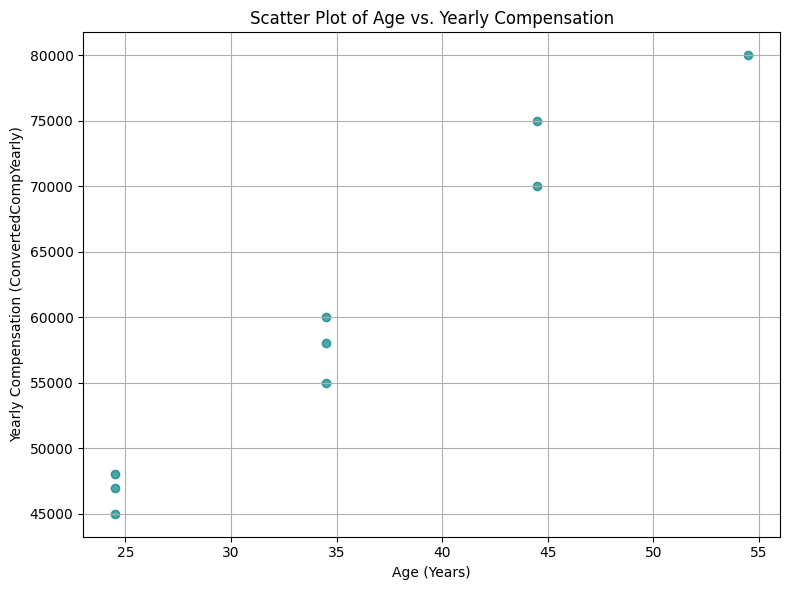

In [7]:
## Write your code here
data = {
    'AgeGroup': ['20-29', '30-39', '20-29', '40-49', '30-39', '50-59', '40-49', '30-39', '20-29'],
    'ConvertedCompYearly': [45000, 55000, 47000, 70000, 60000, 80000, 75000, 58000, 48000]
}
df = pd.DataFrame(data)


age_midpoints = {
    '20-29': 24.5,
    '30-39': 34.5,
    '40-49': 44.5,
    '50-59': 54.5,
}

df['AgeNumeric'] = df['AgeGroup'].map(age_midpoints)

# Scatter plot
plt.figure(figsize=(8,6))
plt.scatter(df['AgeNumeric'], df['ConvertedCompYearly'], alpha=0.7, color='teal')
plt.title('Scatter Plot of Age vs. Yearly Compensation')
plt.xlabel('Age (Years)')
plt.ylabel('Yearly Compensation (ConvertedCompYearly)')
plt.grid(True)
plt.tight_layout()
plt.show()


##### 2. Bubble Plot of `ConvertedCompYearly` and `JobSatPoints_6` with `Age_numeric` as Bubble Size


Explore how compensation and job satisfaction are related, with age as the bubble size.


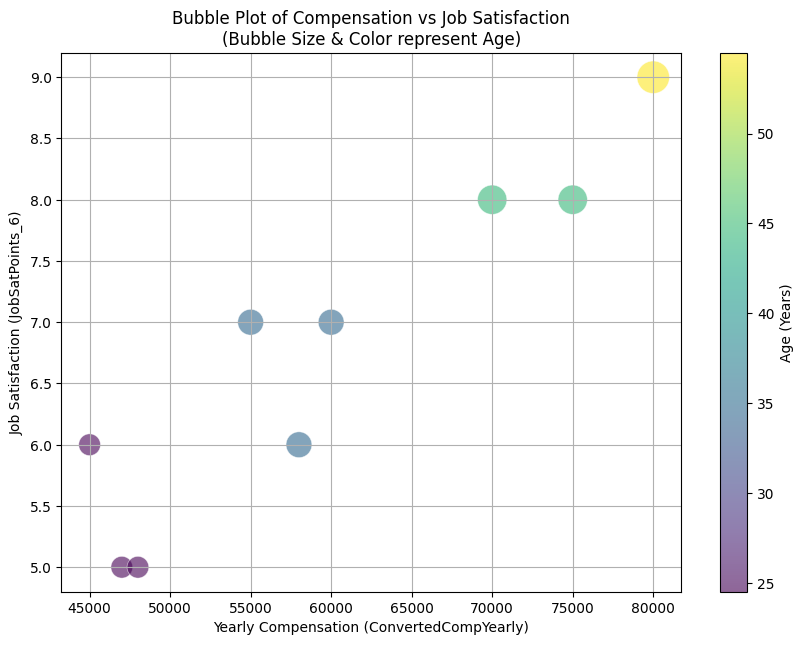

In [8]:
## Write your code here
data = {
    'AgeGroup': ['20-29', '30-39', '20-29', '40-49', '30-39', '50-59', '40-49', '30-39', '20-29'],
    'ConvertedCompYearly': [45000, 55000, 47000, 70000, 60000, 80000, 75000, 58000, 48000],
    'JobSatPoints_6': [6, 7, 5, 8, 7, 9, 8, 6, 5]
}
df = pd.DataFrame(data)

age_midpoints = {
    '20-29': 24.5,
    '30-39': 34.5,
    '40-49': 44.5,
    '50-59': 54.5,
}
df['AgeNumeric'] = df['AgeGroup'].map(age_midpoints)

# Bubble plot
plt.figure(figsize=(10,7))
scatter = plt.scatter(
    df['ConvertedCompYearly'],
    df['JobSatPoints_6'],
    s=df['AgeNumeric'] * 10, 
    alpha=0.6,
    c=df['AgeNumeric'],      
    cmap='viridis',
    edgecolor='w',
    linewidth=0.5
)

plt.title('Bubble Plot of Compensation vs Job Satisfaction\n(Bubble Size & Color represent Age)')
plt.xlabel('Yearly Compensation (ConvertedCompYearly)')
plt.ylabel('Job Satisfaction (JobSatPoints_6)')
plt.colorbar(scatter, label='Age (Years)')
plt.grid(True)
plt.show()


### Task 3: Visualizing Composition of Data with Bar Charts


##### 1. Horizontal Bar Chart of `MainBranch` Distribution


Visualize the distribution of respondents’ primary roles to understand their professional focus.



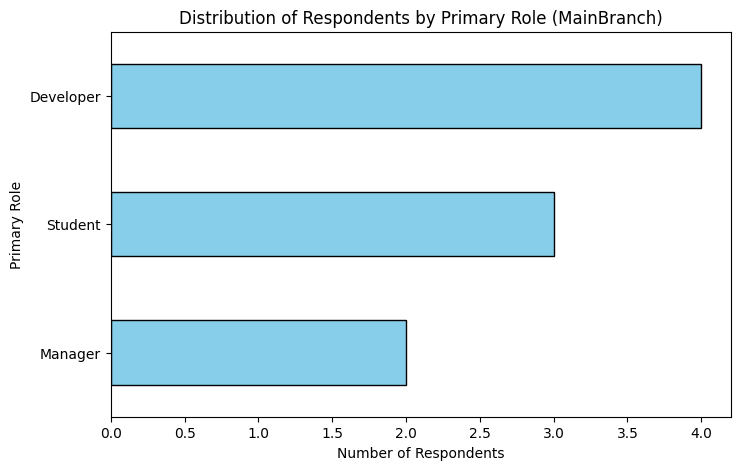

In [9]:
## Write your code here
data = {
    'MainBranch': ['Developer', 'Developer', 'Student', 'Developer', 'Manager', 'Student', 'Manager', 'Developer', 'Student']
}
df = pd.DataFrame(data)


counts = df['MainBranch'].value_counts()

# Plot horizontal bar chart
plt.figure(figsize=(8,5))
counts.plot(kind='barh', color='skyblue', edgecolor='black')
plt.title('Distribution of Respondents by Primary Role (MainBranch)')
plt.xlabel('Number of Respondents')
plt.ylabel('Primary Role')
plt.gca().invert_yaxis() 
plt.show()

##### 2. Vertical Bar Chart of Top 5 Programming Languages Respondents Want to Work With


Identify the most desired programming languages based on `LanguageWantToWorkWith`.



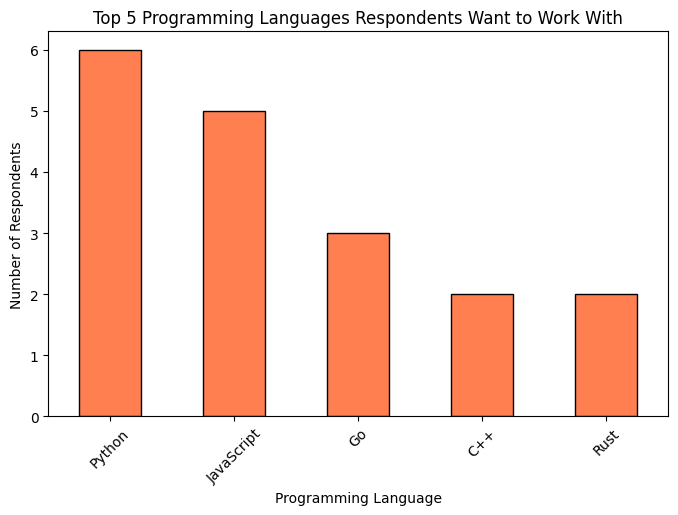

In [10]:
## Write your code here
data = {
    'LanguageWantToWorkWith': [
        'Python;JavaScript;C++',
        'Python;Go',
        'JavaScript;TypeScript',
        'C#;Python',
        'JavaScript;Python;Java',
        'Go;Rust',
        'Python',
        'JavaScript;C++',
        'Rust;Go',
        'Python;JavaScript'
    ]
}
df = pd.DataFrame(data)


df_exploded = df['LanguageWantToWorkWith'].str.split(';').explode()

# Count occurrences of each language
language_counts = df_exploded.value_counts()

# Select top 5 languages
top5 = language_counts.head(5)

# Plot vertical bar chart
plt.figure(figsize=(8,5))
top5.plot(kind='bar', color='coral', edgecolor='black')
plt.title('Top 5 Programming Languages Respondents Want to Work With')
plt.xlabel('Programming Language')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45)
plt.show()


##### 3. Stacked Bar Chart of Median `JobSatPoints_6` and `JobSatPoints_7` by Age Group


Compare job satisfaction metrics across different age groups with a stacked bar chart.


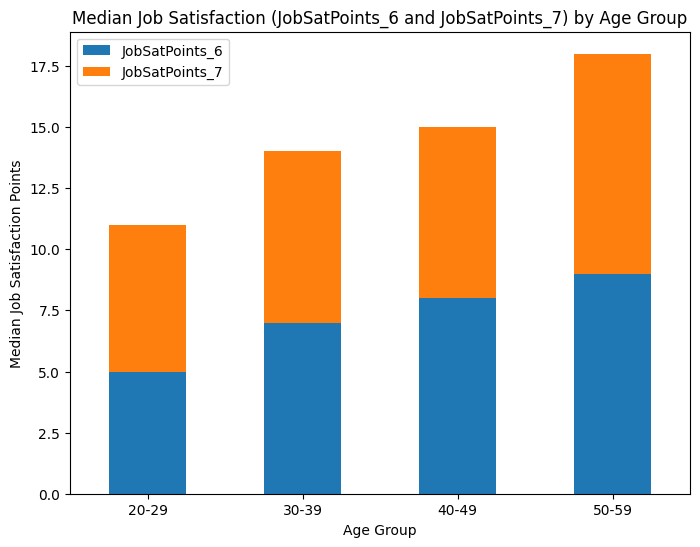

In [11]:
## Write your code here
data = {
    'AgeGroup': ['20-29', '30-39', '20-29', '40-49', '30-39', '50-59', '40-49', '30-39', '20-29'],
    'JobSatPoints_6': [6, 7, 5, 8, 7, 9, 8, 6, 5],
    'JobSatPoints_7': [7, 6, 5, 7, 8, 9, 7, 7, 6]
}
df = pd.DataFrame(data)

# Calculate median satisfaction scores by AgeGroup
median_satisfaction = df.groupby('AgeGroup', observed=False)[['JobSatPoints_6', 'JobSatPoints_7']].median()

# Plot stacked bar chart
median_satisfaction.plot(kind='bar', stacked=True, figsize=(8,6), color=['#1f77b4', '#ff7f0e'])

plt.title('Median Job Satisfaction (JobSatPoints_6 and JobSatPoints_7) by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Median Job Satisfaction Points')
plt.xticks(rotation=0)
plt.legend(['JobSatPoints_6', 'JobSatPoints_7'])
plt.show()


##### 4. Bar Chart of Database Popularity (`DatabaseHaveWorkedWith`)


Identify the most commonly used databases among respondents by visualizing `DatabaseHaveWorkedWith`.



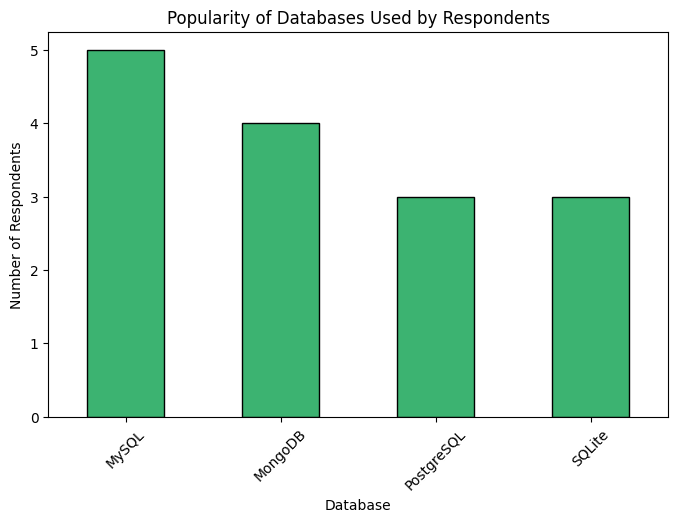

In [12]:
## Write your code here
data = {
    'DatabaseHaveWorkedWith': [
        'MySQL;PostgreSQL',
        'MongoDB',
        'MySQL;SQLite',
        'PostgreSQL;MongoDB',
        'SQLite',
        'MySQL',
        'MongoDB;MySQL',
        'PostgreSQL',
        'MongoDB',
        'SQLite;MySQL'
    ]
}
df = pd.DataFrame(data)

# Split into individual databases
df_exploded = df['DatabaseHaveWorkedWith'].str.split(';').explode()

# Count usage frequency
db_counts = df_exploded.value_counts()

# Plot bar chart
plt.figure(figsize=(8,5))
db_counts.plot(kind='bar', color='mediumseagreen', edgecolor='black')
plt.title('Popularity of Databases Used by Respondents')
plt.xlabel('Database')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45)
plt.show()

### Task 4: Visualizing Comparison of Data with Bar Charts


##### 1. Grouped Bar Chart of Median `ConvertedCompYearly` for Different Age Groups


Compare median compensation across multiple age groups with a grouped bar chart.



In [ ]:
## Write your code here
data = {
    'AgeGroup': ['20-29', '30-39', '20-29', '40-49', '30-39', '50-59', '40-49', '30-39', '20-29'],
    'ConvertedCompYearly': [45000, 55000, 47000, 70000, 60000, 80000, 75000, 58000, 48000]
}
df = pd.DataFrame(data)

# Calculate median compensation by AgeGroup
median_comp = df.groupby('AgeGroup', observed=False)['ConvertedCompYearly'].median().reset_index()
median_comp['Category'] = 'Median Compensation'  

# Pivot for grouped bar chart format
pivot_df = median_comp.pivot(index='AgeGroup', columns='Category', values='ConvertedCompYearly')

# Plot grouped bar chart
pivot_df.plot(kind='bar', figsize=(8,6), edgecolor='black')

plt.title('Median Yearly Compensation by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Median Converted Compensation (Yearly)')
plt.xticks(rotation=0)
plt.legend(title='')

plt.show()


##### 2. Bar Chart of Respondent Count by Country


Show the distribution of respondents by country to see which regions are most represented.



In [ ]:
## Write your code here

### Final Step: Review


This lab demonstrates how to create and interpret different types of bar charts, allowing you to analyze the composition, comparison, and distribution of categorical data in the Stack Overflow dataset, including main professional branches, programming language preferences, and compensation by age group. Bar charts effectively compare counts and median values across various categories.


## Summary


After completing this lab, you will be able to:
- Create a horizontal bar chart to visualize the distribution of respondents' primary roles, helping to understand their professional focus.
- Develop a vertical bar chart to identify the most desired programming languages based on the LanguageWantToWorkWith variable.
- Use a stacked bar chart to compare job satisfaction metrics across different age groups.
- Create a bar chart to visualize the most commonly used databases among respondents using the DatabaseHaveWorkedWith variable.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
